# Loan Rates and the Factors that affect them

## Investigation Overview 

I wanted to look how the various factors of the borrower would act on the prosper score and the interest rate the borrowers received. The main factors of investigation were:
* Borrower Rate (interest rate)
* Income Range
* Credit Score
* Prosper Rating 
* Original Loan Amount 


## DataSet Overview 

The data consisted of around 113,000 loan entries, but was cut down to 84,000 after removing values that did not have a prosper rating indicating that they were not completed loans or not given. There were several attributes in the data set, 82 in all, but we focused on ones that were deemed to be the most relevant to interest rate. 

In [1]:
# I am importing all the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# loading the data set and aliasing it for convenience
loans = pd.read_csv('prosperLoanData.csv')

In [2]:
#data wrangling section 
# this removes any null items in the category and returns the full data set corrected
loans = loans.loc[loans['ProsperScore'].isnull()==False]

# this is correcting this field to datetime 
loans['DateCreditPulled'] = pd.to_datetime(loans['DateCreditPulled'], format="%Y-%m-%d %H:%M:%S")

#updated column so transition to date time is easier 
loans['ListingCreationDate']=loans['ListingCreationDate'].str[:-22]

loans['ListingCreationDate'] = pd.to_datetime(loans['ListingCreationDate'], format="%Y-%m")

# i am making sure that when I want to create a chart, it will automatically order these categories appropriately 
type_dict ={
    "IncomeRange":["Not employed", "$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"], 
    "ProsperRating (Alpha)":["HR", "E", "D", "C", "B", "A", "AA"]
}

for col in type_dict:
    loans[col] = loans[col].astype("category")
    loans[col] = loans[col].cat.set_categories(
        type_dict[col], ordered=True)
    
# we need to create a column that has one number for credit score instead of a grade 
loans['CreditScore']=(loans['CreditScoreRangeLower'] + loans['CreditScoreRangeUpper'])/2

# Count by Prosper Rating 

Prosper Rating is a alpha code that is assigned to every loan request and symbolizes the relative risk of granting that loan. Risk being whether the loan is paid back or not. As we see in the chart, the ratings tend to be unimodal centered around the middle rating 'C', with quite a large jump between 'A' and 'AA'. 

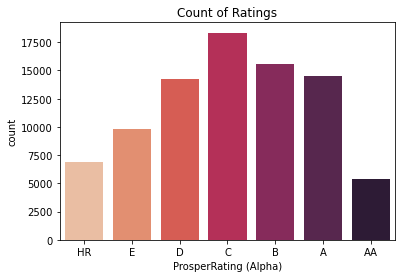

In [19]:
sns.countplot(x='ProsperRating (Alpha)', data=loans, palette='rocket_r')
plt.title("Count of Ratings");

# Prosper Rating by Income Range 

When plotted against each other, we see that there are clear differences between the ratings and income range. The lowest actual income range, 1-25k, peaks at the 'D' rating, with no employment listed peaking at the lowest rating assigned, 'HR' or High Risk. The 25K-50K range peaks at rating 'C' as does the next step up in income 50K-75k. However, 100k+ range actually peaks at an 'A' rating, and the step right beneath that, 75-100K, plateaus at 'C' and remains consistent until a steep decline at 'AA'. 

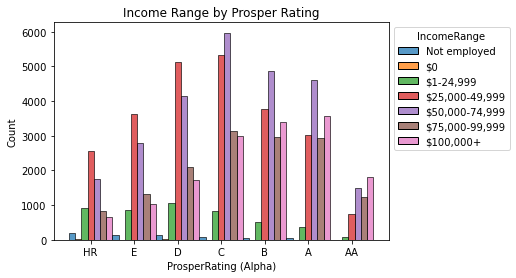

In [4]:
ax = sns.histplot(binwidth=1,
            x='ProsperRating (Alpha)',
            hue='IncomeRange',
            data=loans,
            stat="count",
            multiple="dodge")
plt.title("Income Range by Prosper Rating")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Credit Score vs Interest Rate 

The credit score used here is a mean between the upper range and the lower range, so it is probably skewed a little. Regardless, as this chart shows, the relationship between Credit Score and interest rate is clear and linear. The lines represent the mean borrow rate in each section of credit scores and we used a polynomial regression line for best fit. In the chart, we see that as credit score increases, the interest rate is decreased, steeply at first and then it tails off. This indicates that credit score has an incredibly strong relationship with interest rate. 

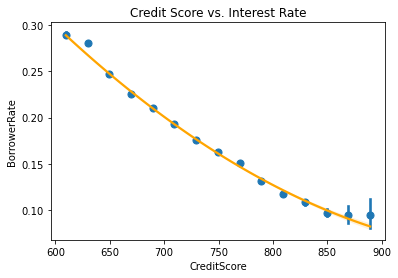

In [18]:
sns.regplot(data=loans, x="CreditScore", y="BorrowerRate", x_estimator=np.mean, order=2, line_kws={'color':'orange'})
plt.title("Credit Score vs. Interest Rate");

# Interest Rate by Credit Score for Income Range

We know that credit score has a bearing on interest rate and we know that income range affects prosper rating, so to see how income range affects credit score and interest rate I made a KDE chart which allows us to see a clear, if messy, relationship. We see that most are clustered around a credit score of 725, with lower earners providing more variance. We also see that even if two borrowers have the same credit score, a difference in income would more likely get them a much higher interest rate. 

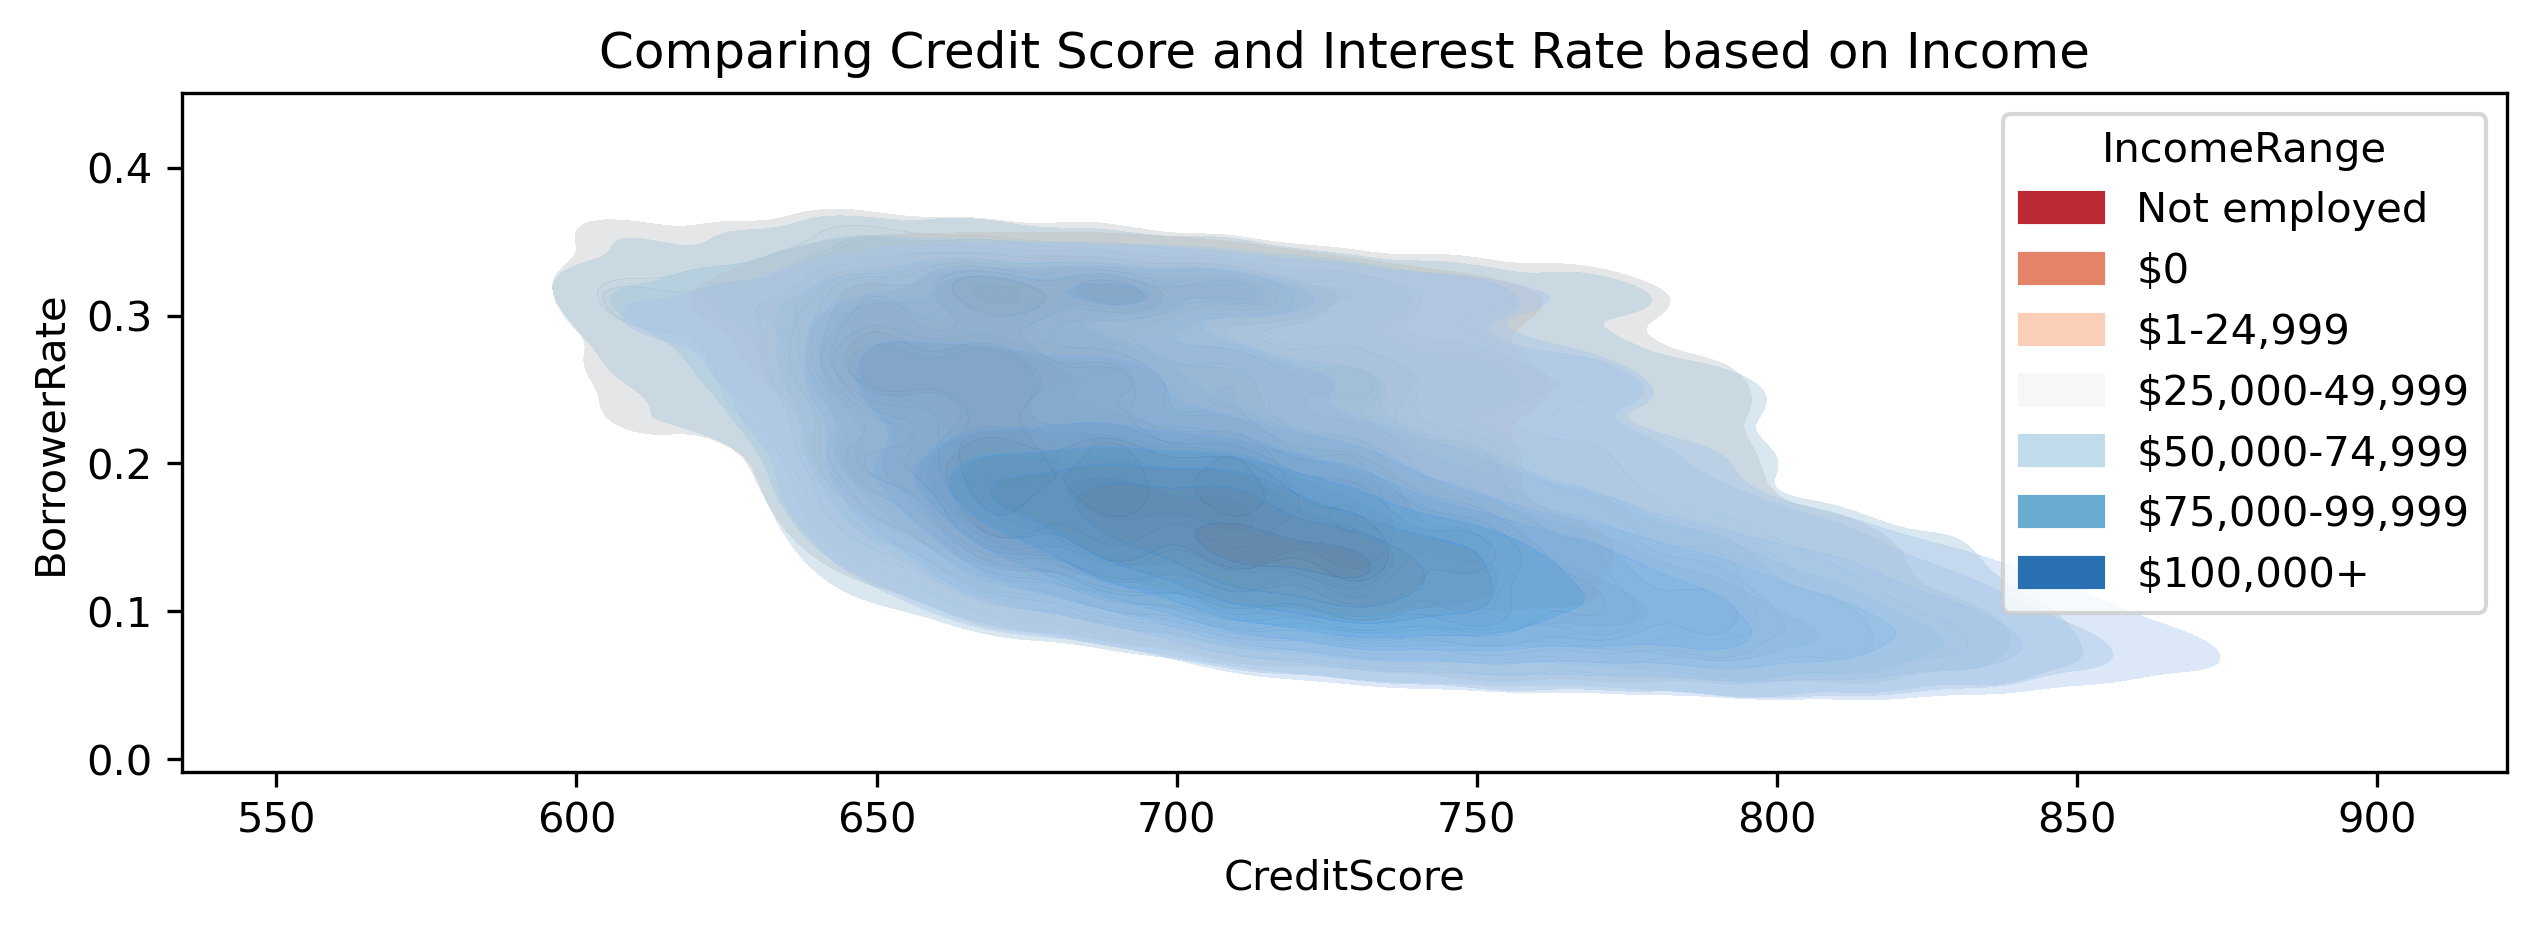

In [23]:
fig, ax = plt.subplots(1, 1, figsize=[10, 3], dpi=300)
sns.kdeplot(data=loans, x="CreditScore", y="BorrowerRate", hue="IncomeRange", alpha=.4, fill=True, ax=ax, palette='RdBu')
ax.set_title("Comparing Credit Score and Interest Rate based on Income");

# Prosper Rating vs Interest Rate by Credit Score 

Building off of the last chart, we see the intersection of the Prosper Rating on interest rate and how credit score is used in that. There is a clear interaction as we see credit scores get much higher as the ratings get higher. However, this is not a perfect 1:1, as we saw in the previous example. There are people with excellent credit scores still receiving 'D' and 'C' scores. There are also people who have low credit scores receiving excellent interest rates and prosper score. 

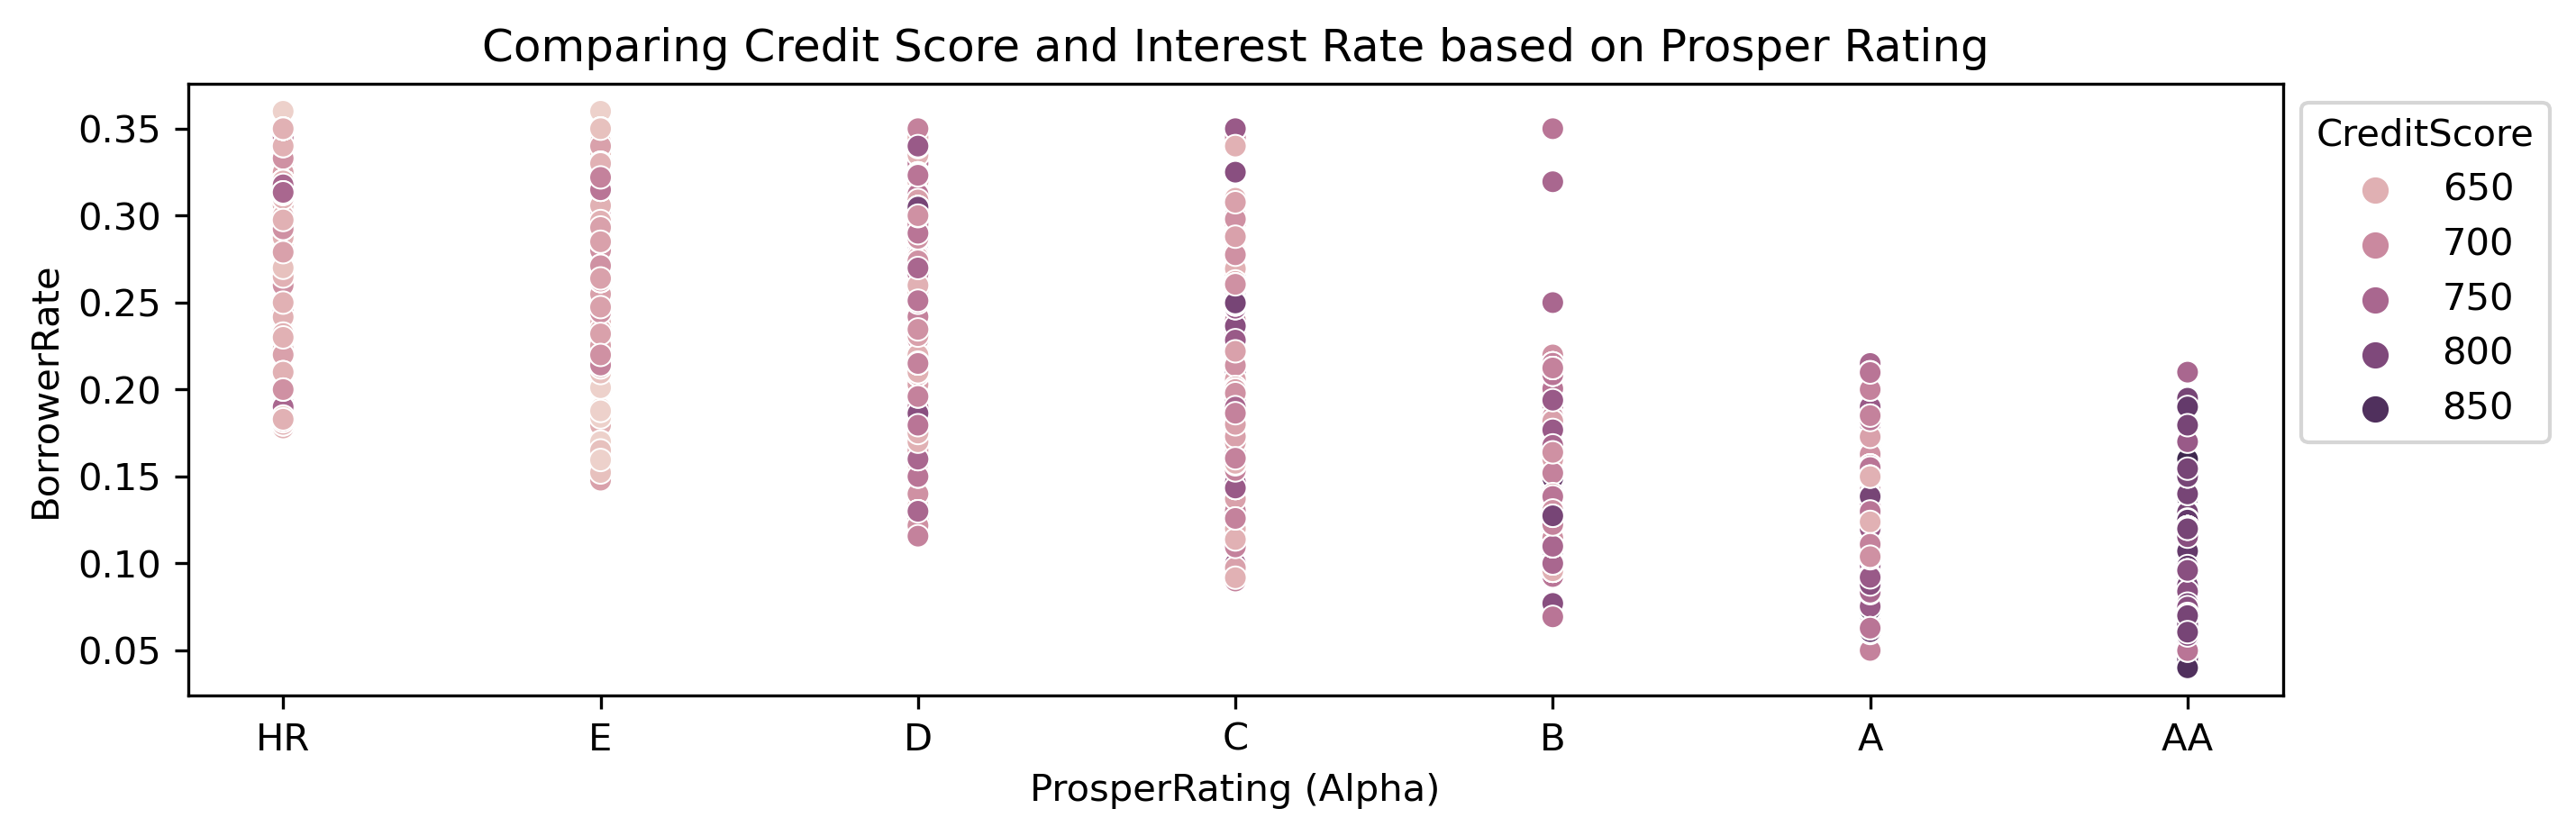

In [25]:
fig, ax = plt.subplots(1, 1, figsize=[10, 3], dpi=300)
sns.scatterplot(data=loans, x="ProsperRating (Alpha)", y="BorrowerRate", hue="CreditScore", ax=ax)
ax.set_title("Comparing Prosper Rating and Interest Rate based on Credit Score")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));